In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import keras_tuner as kt
import cv2
from kerastuner.tuners import Hyperband

import time
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.densenet import preprocess_input as densePI
from sklearn.metrics import classification_report


from sklearn.metrics import classification_report, confusion_matrix 
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_26/909378672.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [2]:
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
!pip install split-folders

In [4]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [5]:
# input_folder = '/content/drive/MyDrive/lymphoma'
# output = '/content/drive/MyDrive/lymphoma test'

folder_path = f"run/"
os.makedirs(folder_path, exist_ok=True)

# Folder dataset disimpan
dataset_input = r"/kaggle/input/lymphoma/lymphoma"
dataset_output = r"/kaggle/working/run"

import splitfolders
splitfolders.ratio(dataset_input, dataset_output, seed=42, ratio=(.7, .15, .15))

Copying files: 374 files [00:24, 15.32 files/s]


In [6]:
img_height, img_width = 1388, 1040
dimension = (img_height, img_width)
# dimensiontemp = (244, 244)
# batch_size = 32

# train_data_dir = r"/content/drive/MyDrive/lymphoma test/train"
# valid_data_dir = r"/content/drive/MyDrive/lymphoma test/val"
# test_data_dir = r"/content/drive/MyDrive/lymphoma test/test"
# Direktori data
train_data_dir = r"/kaggle/working/run/train"
valid_data_dir = r"/kaggle/working/run/val"
test_data_dir = r"/kaggle/working/run/test"

ImageDataGenerator = untuk data augmentasi dan data preprocessing pada image dataset

In [7]:
traindatagenD = ImageDataGenerator(
    # rescale = 1.0/255,
    preprocessing_function=densePI,
)
train_dataD = traindatagenD.flow_from_directory(
    directory = train_data_dir,
    target_size = dimension,
    batch_size = 16
)

validdatagenD = ImageDataGenerator(
    # rescale = 1.0/255,
    preprocessing_function=densePI,
)
valid_dataD = validdatagenD.flow_from_directory(
    directory = valid_data_dir,
    target_size = dimension,
    batch_size = 16,
#     shuffle = False
)
testdatagenD = ImageDataGenerator(
    # rescale = 1.0/255,
    preprocessing_function=densePI,
)
test_dataD = testdatagenD.flow_from_directory(
    directory = test_data_dir,
    target_size = dimension,
    batch_size = 16,
    shuffle = False
)

Found 261 images belonging to 3 classes.
Found 54 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


In [8]:
x,y = test_dataD.next()
x.shape

(16, 1388, 1040, 3)

In [9]:
from tensorflow.keras.optimizers import Adamax
base_model = DenseNet169(include_top=False, weights= 'imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_dataD.num_classes, activation='softmax')(x)
model = Model(inputs = base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/model_checkpoint.h5', save_best_only=True, verbose=1),
#     tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

# model_learning_rate = model.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])
model_learning_rate = [1e-2, 1e-3, 1e-4]

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy', metrics = ['accuracy'])
start_time = time.time()

history = model.fit(train_dataD, epochs=100,validation_data=valid_dataD, verbose = 1,callbacks=callbacks)
end_time = time.time()
total = end_time-start_time
print('waktu : ',total)
print('waktu : ',total/60)
print('waktu : ',total%60)

51877672/51877672 [==============================] - 0s 0us/step
Epoch 1/100
17/17 [==============================] - ETA: 0s - loss: 1.1102 - accuracy: 0.4253
Epoch 1: val_loss improved from inf to 0.95265, saving model to /content/drive/MyDrive/model_checkpoint.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/17 [==============================] - 54s 2s/step - loss: 1.1102 - accuracy: 0.4253 - val_loss: 0.9527 - val_accuracy: 0.5741
Epoch 2/100
17/17 [==============================] - ETA: 0s - loss: 0.9663 - accuracy: 0.5709
Epoch 2: val_loss improved from 0.95265 to 0.84353, saving model to /content/drive/MyDrive/model_checkpoint.h5
17/17 [==============================] - 25s 1s/step - loss: 0.9663 - accuracy: 0.5709 - val_loss: 0.8435 - val_accuracy: 0.5741
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 0.8379 - accuracy: 0.6398
Epoch 3: val_loss improved from 0.84353 to 0.76099, saving model to /content/drive/MyDrive/model_checkpoint.h5
17/17 [==============================] - 25s 1s/step - loss: 0.8379 - accuracy: 0.6398 - val_loss: 0.7610 - val_accuracy: 0.6667
Epoch 4/100
17/17 [==============================] - ETA: 0s - loss: 0.8049 - accuracy: 0.6552
Epoch 4: val_loss improved from 0.76099 to 0.69800, saving model to /content/drive/MyDrive/model_checkpoin

# **Dense Net169**

In [10]:
# def build_model(hp):
#     base_model = DenseNet169(weights='imagenet', include_top=False)

#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(units=hp.Int('dense_units', min_value=64, max_value=512, step=32, default=128), activation='relu')(x)
#     output = Dense(train_dataD.num_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=output)
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model


In [11]:
# max_trials = 5

In [12]:
# tuner = kt.Hyperband(build_model,
#                      objective='val_accuracy',
#                      max_epochs=10,  # Adjust the number of epochs as needed
#                      factor=3,
#                      directory='my_dir',
#                      project_name='densenet169_tuning'
#                      )
# # tuner.search_space.max_trials = max_trials


In [13]:
# start_time = time.time()
# # stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# x_train, y_train = train_dataD.next()
# x_val, y_val = valid_dataD.next()

# tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val),batch_size = 1)
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_model = tuner.hypermodel.build(best_hps)
# end_time = time.time()
# total = end_time-start_time
# print('waktu : ',total)

In [14]:
# start_time = time.time()
# best_model.fit(train_dataD, epochs=50,validation_data=valid_dataD, verbose = 1)
# end_time = time.time()
# total = end_time-start_time
# print('waktu : ',total)

In [15]:
from tensorflow.keras.models import load_model

model_result = load_model('/content/drive/MyDrive/model_checkpoint.h5')

In [16]:
train_loss, train_acc = model_result.evaluate(train_dataD, verbose=1)
print('\nTrain accuracy: ', train_acc)
vall_loss, valid_acc = model_result.evaluate(valid_dataD, verbose=1)
print('\nValid accuracy: ', valid_acc)
test_loss, test_acc = model_result.evaluate(test_dataD, verbose=1)
print('\nTest accuracy: ', test_acc)

17/17 [==============================] - 23s 1s/step - loss: 0.0114 - accuracy: 1.0000

Train accuracy:  1.0
4/4 [==============================] - 5s 950ms/step - loss: 0.1364 - accuracy: 0.9630

Valid accuracy:  0.9629629850387573
4/4 [==============================] - 11s 3s/step - loss: 0.1325 - accuracy: 0.9831

Test accuracy:  0.9830508232116699


In [17]:
y_pred = model_result.predict(test_dataD)
y_true = test_dataD.classes
y_pred = np.argmax(y_pred, axis=1)

classification_rep = classification_report(y_true, y_pred, target_names=test_dataD.class_indices)
print(classification_rep)

4/4 [==============================] - 7s 992ms/step
              precision    recall  f1-score   support

         CLL       1.00      0.94      0.97        18
          FL       1.00      1.00      1.00        22
         MCL       0.95      1.00      0.97        19

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [18]:
from prettytable import PrettyTable

# Assuming conf_matrix is the confusion matrix calculated earlier
conf_matrix = confusion_matrix(y_true, y_pred)

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# Create a table to display TP, TN, FP, FN
table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["True Positives (TP)", TP])
table.add_row(["True Negatives (TN)", TN])
table.add_row(["False Positives (FP)", FP])
table.add_row(["False Negatives (FN)", FN])

print(table)


+----------------------+-------+
|        Metric        | Value |
+----------------------+-------+
| True Positives (TP)  |   22  |
| True Negatives (TN)  |   17  |
| False Positives (FP) |   0   |
| False Negatives (FN) |   0   |
+----------------------+-------+


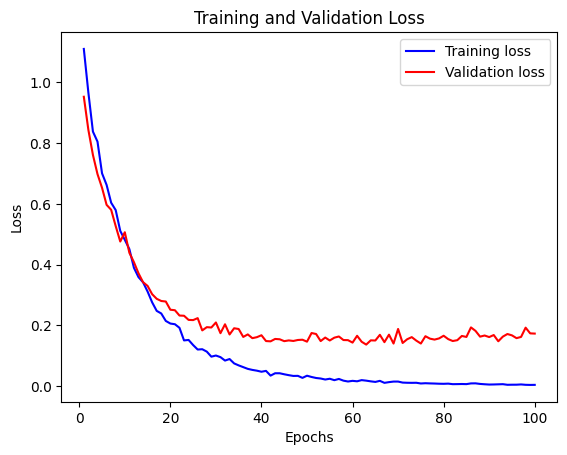

In [19]:
# Menampilkan grafik loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(folder_path, 'loss.png'))
plt.show()

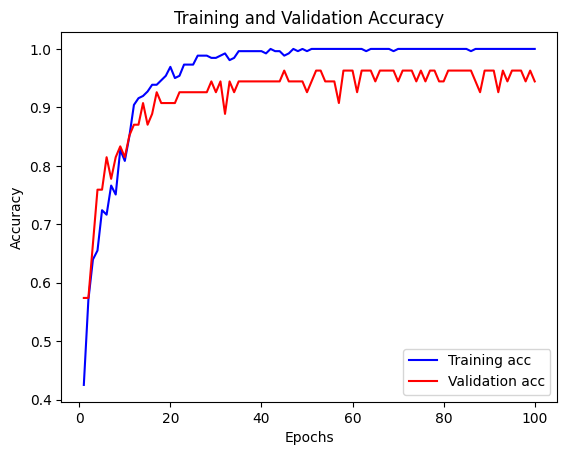

In [20]:
# Menampilkan grafik akurasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(os.path.join(folder_path, 'accuracy.png'))
plt.show()

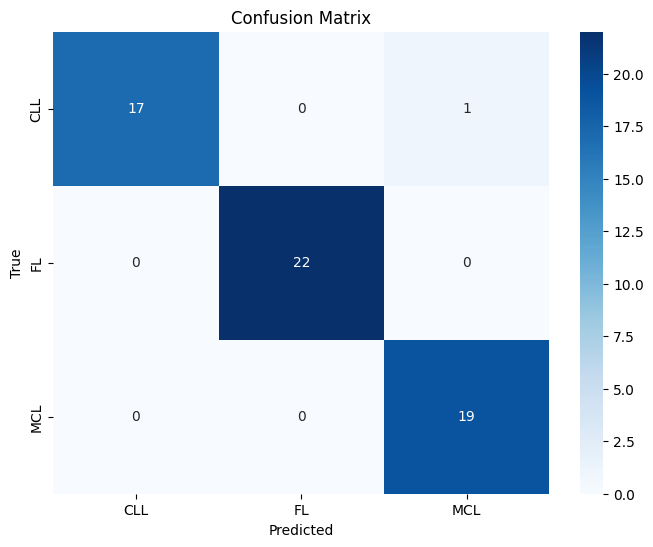

In [21]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataD.class_indices.keys(), yticklabels=test_dataD.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(os.path.join(folder_path, 'confusion_matrix.png'))
plt.show()